Análisis de datos con Python

   
## Objetivos

* Explorar las características del dataset para predecir el precio del vehículo.

<h2>Tabla de contenido</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#Importar_datos">Importar datos</a></li>
    <li><a href="#Visualizacion_de_patrones">Análisis de patrones de características individuales mediante visualización</a></li>
    <li><a href="#Estadistica_descriptiva">Análisis estadístico descriptivo</a></li>
    <li><a href="#Agrupacion">Agrupación</a></li>
    <li><a href="#Correlacion_y_causalidad">Correlación y Causalidad</a></li>
    <li><a href="#Anova">ANOVA</a></li>
</ol>

</div>
 
<hr>

<h3> ¿Cuáles son las principales características que tienen el mayor impacto en el precio de un vehículo? </h3>

<h2 id="Importar_datos">1. Importando el dataset</h2>

Import libraries: 

In [1]:
import pandas as pd
import numpy as np

Cargaremos los datos y lo almacenaremos en el dataframe `df`: 

Trabajaremos con un dataset de automóviles que está almacenado en un repositorio de datos en la siguiente dirección: https://archive.ics.uci.edu/, está en un formato CSV (valores separados por comas).

Podemos encontrar el "Automobile Dataset" en el siguiente enlace: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 


In [2]:
ruta='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(ruta)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2 id="Visualizacion_de_patrones">2. Analizando características individuales de patrones mediante visualización</h2>

Importamos paquetes de visualización "Matplotlib" y "Seaborn".

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<h4>¿Cómo elegir el método de visualización correcto? </h4>
<p>Al visualizar variables individuales, es importante entender primero con qué tipo de variable se está tratando. Esto nos ayudará a encontrar el método de visualización adecuado para esa variable. </p>

In [4]:
# Veamos los tipos de datos para cada columna
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


Por ejemplo, podemos calcular la correlación entre variables de tipo "int64" o "float64" utilizando el método "corr":

In [5]:
df[['horsepower', 'price']].corr()

,horsepower,price
horsepower,1.000000,0.809575
price,0.809575,1.000000


Los elementos diagonales son siempre uno; estudiaremos la correlación, más precisamente la correlación de Pearson en profundidad al final de este documento.

In [6]:
# Acá veremos la correlación de otras variables:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2>Variables numéricas continuas:</h2> 

<p>Las variables numéricas continuas son variables que pueden contener cualquier valor dentro de algún rango. Pueden ser de tipo "int64" o "float64". Una gran manera de visualizar estas variables es usando scatterplots con líneas ajustadas. </p>

<p>Para empezar a entender la relación (lineal) entre una variable individual y el precio, podemos usar "regplot" que traza el diagrama de dispersión más la línea de regresión ajustada para los datos. Esto también será útil más adelante para visualizar el ajuste del modelo de regresión lineal simple. </p>

 Veamos varios ejemplos de diferentes relaciones lineales:

<h3>Relación lineal positiva</h4>

Veamos el diagrama de dispersión de "engine-size" y "price".

(0.0, 53718.43387743237)

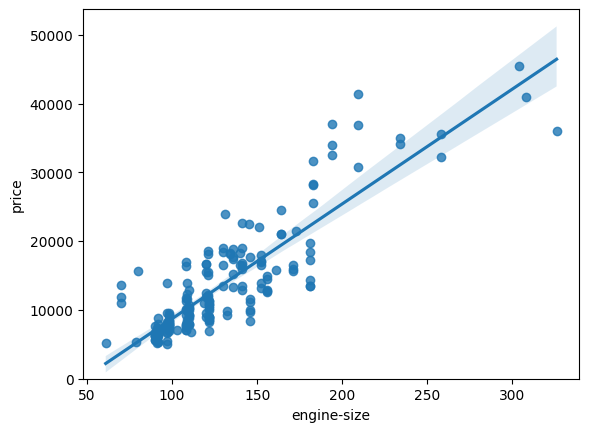

In [7]:
# Tamaño del motor como potencial variable predictora del precio
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>A medida que el tamaño del motor aumenta, el precio sube: esto indica una correlación directa positiva entre estas dos variables. El tamaño del motor parece un buen predictor de precio ya que la línea de regresión es casi una línea diagonal perfecta. </p>

 Podemos examinar la correlación entre 'tamaño del motor' y 'precio' y ver que es aproximadamente 0.87.

In [8]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


highway-mpg es una potencial variable predictora de precio. Veamos el scatterplot de "carretera-mpg" y "price".

<Axes: xlabel='highway-mpg', ylabel='price'>

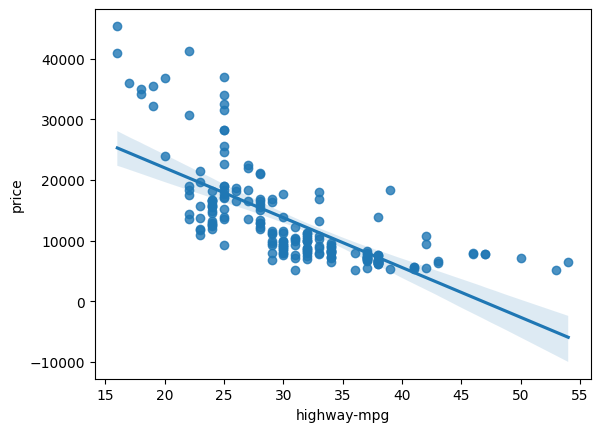

In [9]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>A medida que la highway-mpg sube, el precio baja: esto indica una relación inversa/negativa entre estas dos variables. Highway-mpg podría ser un potencial predictor de precio. </p>

Podemos examinar la correlación entre 'highway-mpg' y 'price' y ver que es aproximadamente -0.704.

In [10]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Relación lineal débil</h3>

Veamos si "peak-rpm" es una variable predictora de "price".

<Axes: xlabel='peak-rpm', ylabel='price'>

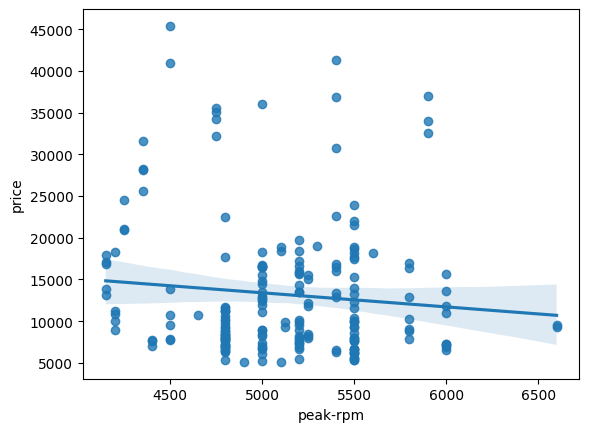

In [11]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>"peak-rpm" no parece un buen predictor del precio, ya que la línea de regresión está cerca de la horizontal. Además, los puntos de datos están muy dispersos y lejos de la línea ajustada, mostrando mucha variabilidad. Por lo tanto, no es una variable confiable. </p>

Podemos examinar la correlación entre 'peak-rpm' y 'price' y ver que es aproximadamente -0.101616.

In [12]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<h3>Variables categóricas</h3>

<p>Una variable categórica es un tipo de variable que solo admite un número limitado de valores, es decir tiene un número finito de posibles valores. Las variables categóricas pueden tener el tipo "object" o "int64". Una buena manera de visualizar variables categóricas es usando gráficos de caja y bigotes. </p>

Veamos la relación entre "body-style" y "price".

<Axes: xlabel='body-style', ylabel='price'>

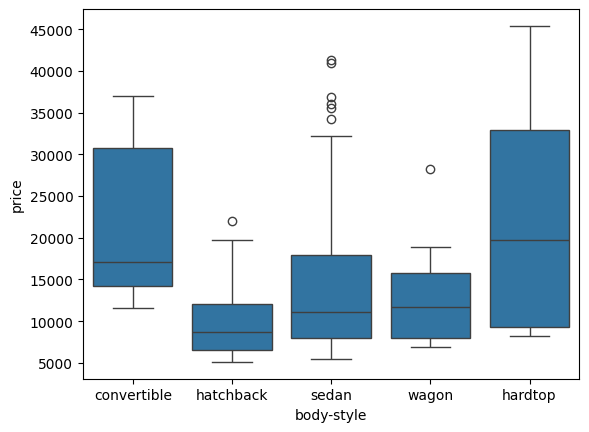

In [13]:
sns.boxplot(x="body-style", y="price", data=df)

<p>Vemos que las distribuciones de precio entre las diferentes categorías de body-style tienen una superposición significativa, por lo que el estilo de cuerpo no sería un buen predictor de precio. Examinemos el motor "engine-location" y "price":</p>

<Axes: xlabel='engine-location', ylabel='price'>

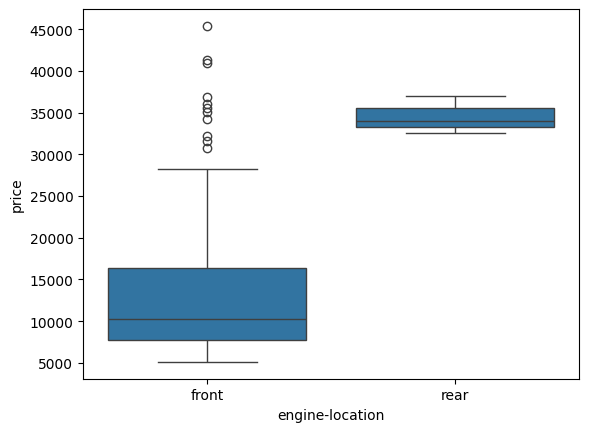

In [14]:
sns.boxplot(x="engine-location", y="price", data=df)

Aquí vemos que la distribución del precio entre estas dos categorías de ubicación del motor, delantera y trasera, son lo suficientemente distintas como para tomar la ubicación del motor como un buen predictor potencial del precio.

Examinemos "drive-wheels" y "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

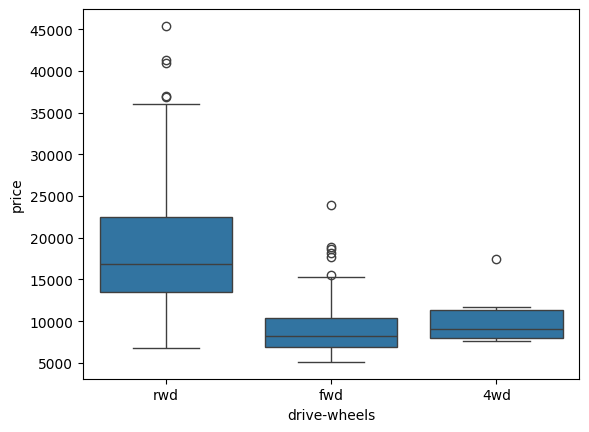

In [15]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Aquí vemos que la distribución del precio entre las diferentes categorías de drive-wheels difiere. Como tal, la variable "drive-wheels" podría potencialmente ser un predictor de precio.

<h2 id="Estadistica_descriptiva">3. Análisis estadístico descriptivo</h2>

<p>Primero echemos un vistazo a las variables utilizando un método de descripción. </p>

<p>La función <b>describe</b> calcula automáticamente las estadísticas básicas para todas las variables continuas. Cualquier valor NaN se omite automáticamente en estas estadísticas. </p>

Esto mostrará lo siguiente:
<ul>
    <li>el recuento de esa variable</li>
    <li>la media</li>
    <li>la desviación estándar (std)</li> 
    <li>el valor mínimo</li>
    <li>el IQR (Rango intercuartílico: 25%, 50% y 75%)</li>
    <li>el valor máximo</li>
<ul>



 Podemos aplicar el método "describe" de la siguiente manera:

In [16]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


 La configuración predeterminada de "describe" omite las variables de tipo objeto. Podemos aplicar el método "describe" en las variables de tipo objeto de la siguiente manera:

In [17]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3>Conteo de valores</h3>

<p>El conteo de valores es una buena manera de entender cuántas unidades de cada característica/variable tenemos. Podemos aplicar el método "value_counts" en la columna "drive-wheels". Debemos tener en cuenta que el método "value_counts" solo funciona en series pandas, no en dataframes pandas por lo que solo agreagmos un corchete <code>df['drive-wheels']</code>.


In [18]:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

In [19]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

Podemos convertir la serie a un dataframe de la siguiente manera:

In [20]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Repitamos los pasos anteriores, pero guardemos los resultados en un dataFrame "conteo_drive_wheels".

In [21]:
conteo_drive_wheels = df['drive-wheels'].value_counts().to_frame()
conteo_drive_wheels

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Podemos repetir el proceso anterior para la variable 'engine-location'.

In [22]:
conteo_engine_loc = df['engine-location'].value_counts().to_frame()
conteo_engine_loc.head(10)

,count
engine-location,
front,198
rear,3


<p>Después de examinar los recuentos de valor de la ubicación del motor, vemos que la ubicación del motor no sería una buena variable predictora para el precio. Esto se debe a que solo tenemos tres vehículos con un motor trasero y 198 con un motor en la parte delantera, por lo que este resultado es sesgado. Por lo tanto, no podemos sacar conclusiones sobre la ubicación del motor. </p>

<h2 id="Agrupacion">4. Agrupación</h2>

<p>El método "groupby" agrupa los datos por diferentes categorías. Los datos se agrupan en base a una o varias variables, y el análisis se realiza en los grupos individuales. </p>

<p>Por ejemplo, agrupemos por la variable "drive-wheels". Vemos que hay 3 categorías diferentes de tracción. </p>

In [23]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>Si queremos saber, en promedio, qué tipo de rueda motriz es más costosa, podemos agrupar "drive-wheels" y luego promediarlas. </p>

<p>Podemos seleccionar las columnas 'drive-wheels' y 'price', luego asignarlo a la variable "traccion". </p>

In [24]:
traccion = df[['drive-wheels','price']]
traccion

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
...,...,...
196,rwd,16845.0
197,rwd,19045.0
198,rwd,21485.0
199,rwd,22470.0


Luego podemos calcular el precio promedio para cada una de las diferentes categorías de datos.

In [25]:
traccion = traccion.groupby(['drive-wheels'],as_index=False).mean()
traccion

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>De nuestros datos, parece que los vehículos de tracción trasera (rwd) son, en promedio, los más caros, mientras que las 4 ruedas (4wd) y las ruedas delanteras (fwd) son similares en precio. </p>

<p>También puedes agrupar múltiples variables. Por ejemplo, agrupemos 'drive-wheels' y 'body-style'. Esto agrupa el dataframe por la combinación única de 'drive-wheels' y 'body-style'. Podemos almacenar los resultados en la variable 'grupo 1'. </p>

In [26]:
columnas = df[['drive-wheels','body-style','price']]
grupo_1 = columnas.groupby(['drive-wheels','body-style'],as_index=False).mean()
grupo_1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>Estos datos agrupados son mucho más fáciles de visualizar cuando se convierten en una tabla dinámica. Una tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir el dataframe a una tabla dinámica usando el método "pivot" para crear una tabla dinámica de los grupos. </p>

<p>En este caso, dejaremos la variable drive-wheels como las filas de la tabla, y body-style para las columnas de la tabla:</p>

In [27]:
tabla_dinamica = grupo_1.pivot(index='drive-wheels',columns='body-style')
tabla_dinamica

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>A menudo, no tendremos datos para algunas de las celdas dinámicas. Podemos llenar estas celdas faltantes con el valor 0, pero cualquier otro valor podría usarse también. Cabe mencionar que la falta de datos es un tema bastante complejo y debe ser abordado. </p>

In [28]:
tabla_dinamica = tabla_dinamica.fillna(0)
tabla_dinamica

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<h4>Variables: Drive Wheels y Body Style versus Price</h4>

Vamos a utilizar un mapa de calor para visualizar la relación entre Body Style vs Price.

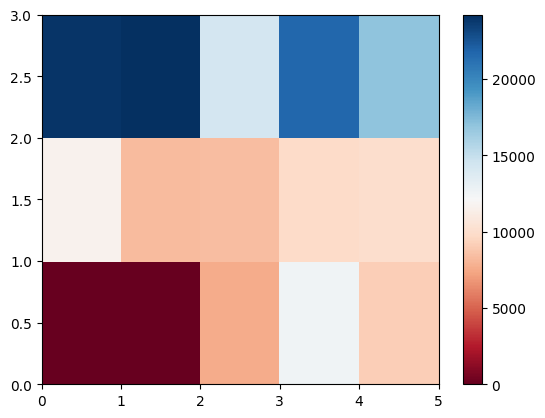

In [29]:
# Usaremos la tabla dinamica
plt.pcolor(tabla_dinamica, cmap='RdBu')
plt.colorbar()
plt.show()

<p>El mapa de calor traza la variable objetivo (precio) proporcional al color con respecto a las variables 'drive-wheel' y 'body-style' en el eje vertical y horizontal, respectivamente. Esto nos permite visualizar cómo el precio está relacionado con 'drive-wheel' y 'body-style'.</p>

<p>Las etiquetas por defecto no nos proporcionan información útil. Cambiemos eso:</p>

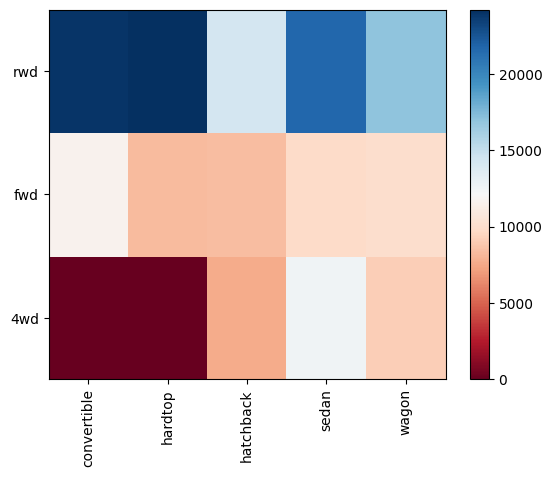

In [30]:
fig, ax = plt.subplots()
im = ax.pcolor(tabla_dinamica, cmap='RdBu')

# Nombre de etiquetas
filas = tabla_dinamica.columns.levels[1]
columnas = tabla_dinamica.index

# Centramos los nombres de etiquetas
ax.set_xticks(np.arange(tabla_dinamica.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(tabla_dinamica.shape[0]) + 0.5, minor=False)

# Insertamos etiquetas
ax.set_xticklabels(filas, minor=False)
ax.set_yticklabels(columnas, minor=False)

# Rotamos los nombres de etiquetas 90°
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>La pregunta principal que queremos responder es, "¿Cuáles son las principales características que tienen el mayor impacto en el precio del automóvil?". </p>

<p>Para obtener una mejor medida de las características importantes, observamos la correlación de estas variables con el precio del automóvil. En otras palabras: ¿cómo depende el precio del coche de esta variable? </p>

<h2 id="Correlacion_y_causalidad">5. Correlación y causalidad</h2>

<p><b>Correlación</b>: una medida del grado de interdependencia entre variables. </p>

<p><b>Causalidad</b>: la relación entre causa y efecto entre dos variables. </p>

<p>Es importante conocer la diferencia entre estos dos. La correlación no implica causalidad. Determinar la correlación es mucho más simple y la causalidad puede requerir experimentación independiente. </p>

<p><b>Correlación de Pearson</b></p>
<p>La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.</p>
<p>El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:</p>
<ul>
    <li><b>1</b>: Correlación lineal positiva perfecta. </li>
    <li><b>0</b>: No hay correlación lineal, las dos variables más probablemente no se afectan entre sí. </li>
    <li><b>-1</b>: Correlación lineal negativa perfecta. </li>
</ul>

<p>La correlacion de Pearson es el método por defecto de la función "corr". Como antes, podemos calcular la correlación de Pearson de las variables 'int64' o 'float64'. </p>

In [31]:
tabla_dinamica.corr()

price                                        
body-style        convertible   hardtop hatchback     sedan     wagon
      body-style                                                     
price convertible    1.000000  0.986671  0.922108  0.741558  0.920736
      hardtop        0.986671  1.000000  0.972782  0.840847  0.971958
      hatchback      0.922108  0.972782  1.000000  0.943386  0.999994
      sedan          0.741558  0.840847  0.943386  1.000000  0.944551
      wagon          0.920736  0.971958  0.999994  0.944551  1.000000

Necesitamos saber si la correlacion es estadísticamente significativa 

<b>Valor P</b>
<p>El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significación de 0,05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa. </p>

Por convención, cuando el
<ul>
    <li>p-valor es $<$ 0.001: decimos que hay evidencia fuerte de que la correlación es significativa. </li>
    <li>el valor p es $<$ 0.05: hay evidencia moderada de que la correlación es significativa. </li>
    <li>el valor p es $<$ 0.1: hay evidencia débil de que la correlación es significativa. </li>
    <li>el valor p es $>$ 0.1: no hay evidencia de que la correlación sea significativa. </li>
</ul>

 Podemos obtener esta información usando el módulo "stats" en la biblioteca "scipy".

In [32]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>

Calculemos el coeficiente de correlación de Pearson y el valor P de 'wheel-base' y 'price'. 

In [33]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("El coeficiente de correlación de Pearson es", pearson_coef, " con un P-value de P =", p_value)  

El coeficiente de correlación de Pearson es 0.584641822265508  con un P-value de P = 8.076488270732947e-20


<h4>Conclusión:</h4>
<p>Dado que el valor p es menor que 0.001, la correlación entre la base de la rueda y el precio es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~0.585). </p>

<h3>Caballos de fuerza versus Precio</h3>

Calcularemos el coeficiente de correlación de Pearson y el valor P de caballos de fuerza y precio.

In [34]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("El coeficiente de correlacion de Pearson es", pearson_coef, " Con un P-value de P = ", p_value)  

El coeficiente de correlacion de Pearson es 0.8095745670036562  Con un P-value de P =  6.369057428259526e-48


<h4>Conclusión:</h4>

<p>Dado que el valor p es < 0.001, la correlación entre la potencia y el precio es estadísticamente significativa, y la relación lineal es bastante fuerte (~0.809, cerca de 1). </p>

<h3>Longitud vs. Precio</h3>

Calculemos el coeficiente de correlación de Pearson y el valor P de 'longitud' y 'precio'.

In [35]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("El coeficiente de correlacion de Pearson es", pearson_coef, " Con un P-value de P = ", p_value)  

El coeficiente de correlacion de Pearson es 0.6906283804483639  Con un P-value de P =  8.016477466159153e-30


<h4>Conclusión:</h4>
<p>Dado que el valor p es < 0.001, la correlación entre la longitud y el precio es estadísticamente significativa, y la relación lineal es moderadamente fuerte (~0.691). </p>

<h3>Width vs. Price</h3>

 Calculemos el coeficiente de correlación de Pearson y el valor P de 'width' y 'price':

In [36]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("El coeficiente de correlacion de Pearson es", pearson_coef, " Con un P-value de P = ", p_value)  

El coeficiente de correlacion de Pearson es 0.7512653440522672  Con un P-value de P =  9.200335510482065e-38


##### Conclusión:

Dado que el valor p es < 0.001, la correlación entre ancho y precio es estadísticamente significativa, y la relación lineal es bastante fuerte (~0.751).

### Curb-Weight vs. Price

 Calculemos el coeficiente de correlación de Pearson y el valor P de 'curb-weight' y 'price':


In [37]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("El coeficiente de correlacion de Pearson es", pearson_coef, " Con un P-value de P = ", p_value)  

El coeficiente de correlacion de Pearson es 0.8344145257702843  Con un P-value de P =  2.189577238893972e-53


<h4>Conclusión:</h4>
<p>Dado que el valor p es < 0.001, la correlación entre curb-weight y el price es estadísticamente significativa, y la relación lineal es bastante fuerte (~0.834). </p>


<h3>Engine-Size vs. Price</h3>

Vamos a calcular el coeficiente de correlación de Pearson y el valor P de 'engine-size' and 'price':

In [38]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("El coeficiente de correlacion de Pearson es", pearson_coef, " Con un P-value de P = ", p_value)  

El coeficiente de correlacion de Pearson es 0.8723351674455181  Con un P-value de P =  9.265491622201997e-64


<h4>Conclusión:</h4>

<p>Dado que el valor p es < 0.001, la correlación entre el tamaño del motor y el precio es estadísticamente significativa, y la relación lineal es muy fuerte (~0.872). </p>

<h3>Bore vs. Price</h3>

 Calculemos el coeficiente de correlación de Pearson y el valor P de 'bore' and 'price':

In [39]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("El coeficiente de correlacion de Pearson es", pearson_coef, " Con un P-value de P = ", p_value)

El coeficiente de correlacion de Pearson es 0.5431553832626603  Con un P-value de P =  8.04918948393533e-17


<h4>Conclusión:</h4>
<p>Dado que el valor p es < 0.001, la correlación entre el diámetro y el precio es estadísticamente significativa, pero la relación lineal es solo moderada (~0.543). </p>

<h3>City-mpg vs. Price</h3>

In [40]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("El coeficiente de correlacion de Pearson es", pearson_coef, " Con un P-value de P = ", p_value) 

El coeficiente de correlacion de Pearson es -0.6865710067844678  Con un P-value de P =  2.321132065567512e-29


<h4>Conclusión:</h4>
<p>Dado que el valor p es < 0.001, la correlación entre ciudad-mpg y precio es estadísticamente significativa, y el coeficiente de aproximadamente -0.686 muestra que la relación es negativa y moderadamente fuerte. </p>

<h3>Highway-mpg vs. Price</h3>

In [41]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("El coeficiente de correlacion de Pearson es", pearson_coef, " Con un P-value de P = ", p_value) 

El coeficiente de correlacion de Pearson es -0.704692265058953  Con un P-value de P =  1.7495471144475452e-31


#### Conclusión:
Dado que el valor p es < 0.001, la correlación entre carretera-mpg y precio es estadísticamente significativa, y el coeficiente de alrededor de -0.705 muestra que la relación es negativa y moderadamente fuerte.

<h2 id="anova">6. ANOVA</h2>

<h3>ANOVA: Análisis de Varianza</h3>
<p>El Análisis de Varianza  (ANOVA) es un método estadístico utilizado para probar si hay diferencias significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetros:</p>

<p><b>F-test score</b>: ANOVA asume que las medias de todos los grupos son las mismas, calcula cuánto se desvían las medias reales de la suposición, y lo reporta como el puntaje de la prueba F. Una puntuación mayor significa que hay una diferencia mayor entre los medios. </p>

<p><b>Valor P</b>:  El valor P indica cuán significativo estadísticamente es nuestro valor de puntuación calculado. </p>

<p>Si nuestra variable de precio está fuertemente correlacionada con la variable que estamos analizando, esperamos que ANOVA devuelva un puntaje de prueba F alto y un valor p pequeño. </p>

<h3>Drive Wheels</h3>

<p>Dado que ANOVA analiza la diferencia entre diferentes grupos de la misma variable, la función groupby será muy útil. Debido a que el algoritmo ANOVA promedia los datos automáticamente, no necesitamos tomar el promedio de antemano. </p>

<p>Para ver si diferentes tipos de "tracción" impacta en el "precio", agrupamos los datos.</p>

In [52]:
grupo_2=df[['drive-wheels', 'price']].groupby(['drive-wheels'])
grupo_2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


 Podemos obtener los valores del grupo utilizando el método "get_group".

In [48]:
grupo_2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

Podemos usar la función 'f_oneway' del módulo 'stats' para obtener la puntuación <b>F-test</b> y <b>P-value</b>.



In [49]:
# ANOVA
f_val, p_val = stats.f_oneway(grupo_2.get_group('fwd')['price'], grupo_2.get_group('rwd')['price'], grupo_2.get_group('4wd')['price'])  
 
print( "Resultados de ANOVA: F=", f_val, ", P =", p_val)  

Resultados de ANOVA: F= 67.95406500780399 , P = 3.3945443577149576e-23


Este es un gran resultado con un gran puntaje de prueba F que muestra una fuerte correlación y un valor P de casi 0 que implica casi cierta importancia estadística. ¿Pero significa esto que los tres grupos probados están altamente correlacionados? 

Vamos a examinarlos por separado.

#### fwd y rwd

In [53]:
f_val, p_val = stats.f_oneway(grupo_2.get_group('fwd')['price'], grupo_2.get_group('rwd')['price'])  
 
print( "Resultados de ANOVA: F=", f_val, ", P =", p_val)  

Resultados de ANOVA: F= 130.5533160959111 , P = 2.2355306355677366e-23


 Examinemos los otros grupos.

#### 4wd y rwd

In [54]:
f_val, p_val = stats.f_oneway(grupo_2.get_group('4wd')['price'], grupo_2.get_group('rwd')['price'])  
   
print( "Resultados de ANOVA: F=", f_val, ", P =", p_val)  

Resultados de ANOVA: F= 8.580681368924756 , P = 0.004411492211225367


<h4>4wd y fwd</h4>

In [55]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print( "Resultados de ANOVA: F=", f_val, ", P =", p_val)   

Resultados de ANOVA: F= 0.665465750252303 , P = 0.4162011669784502


Notamos que el ANOVA para las categorías `4wd` y `fwd` produce un valor p alto > 0.1, por lo que el puntaje de prueba F calculado no es muy significativo estadísticamente. Esto sugiere que no podemos rechazar la suposición de que los medios de estos dos grupos son los mismos, o, en otras palabras, no podemos concluir que la diferencia en la correlación sea significativa.

<h3>Conclusión: Variables importantes</h3>

<p>Ahora tenemos una mejor idea de cómo se ven nuestros datos y qué variables son importantes tener en cuenta al predecir el precio del automóvil. Lo hemos reducido a las siguientes variables:</p>

Variables numéricas continuas:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Variables categóricas:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>A medida que avanzamos en la construcción de modelos de aprendizaje automático para automatizar nuestro análisis, alimentar el modelo con variables que afectan significativamente nuestra variable objetivo mejorará el rendimiento de predicción de nuestro modelo. </p>

### Gracias por leer

## Autor

<a href="https://www.linkedin.com/in/jesus-oliveros-860955223/" target="_blank">Jesús Oliveros</a>